<a href="https://colab.research.google.com/github/victorious07/Clustering_Capstone_Project/blob/main/Netflix_Movies_And_TVShows_Clustering_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

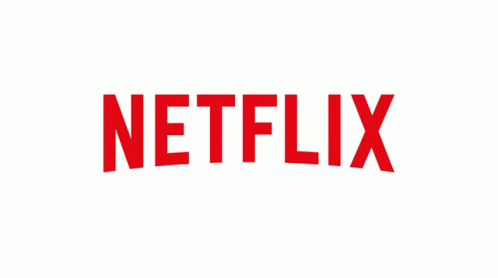

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Libraries**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_style('darkgrid')
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# **Data Inspection**

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#read csv file
file_path ='/content/drive/MyDrive/Clustering_Capstone_Project/'
netflix_df = pd.read_csv(file_path + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
#first five rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#last five rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#shape
netflix_df.shape

(7787, 12)

In [7]:
#info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#checking duplicates
netflix_df.duplicated().sum()

0

In [9]:
#checking null values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Columns**

In [10]:
#columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
col_lst = netflix_df.columns.to_list()

In [12]:
text=''
for col_name in col_lst:
  if '_' in col_name:
    text +=col_name.title().replace('_','')+' '
  else:
    text +=col_name.title()+' '


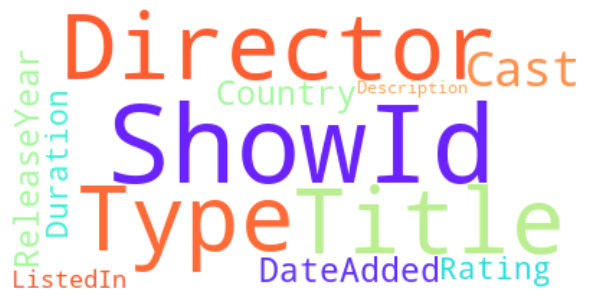

In [15]:
wordcloud = WordCloud(background_color ='white',colormap='rainbow').generate(text)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 

# **Data Cleaning**

**Missing Values and Percentage**

In [ ]:
#calculating no.of missing values
df1 = netflix_df.isnull().sum().reset_index().rename(columns={'index':'column_name', 0:'no.of_missing'})

#calculating missing percentage
percent_missing = netflix_df.isnull().sum() * 100 / len(netflix_df)
df2 = percent_missing.reset_index().rename(columns={'index':'column_name', 0:'missing_percentage'}).round(2)

#merging dataframes on column_name
missing_value_df = df1.merge(df2,on='column_name')

In [ ]:
missing_value_df

,column_name,no.of_missing,missing_percentage
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,2389,30.68
4,cast,718,9.22
5,country,507,6.51
6,date_added,10,0.13
7,release_year,0,0.00
8,rating,7,0.09
9,duration,0,0.00


**Observations:**
* **director** column has highest NaN values 30.7% data is missing
* **cast** column has 9% NaN values
* **country , date_added , rating** this columns also containing missing values

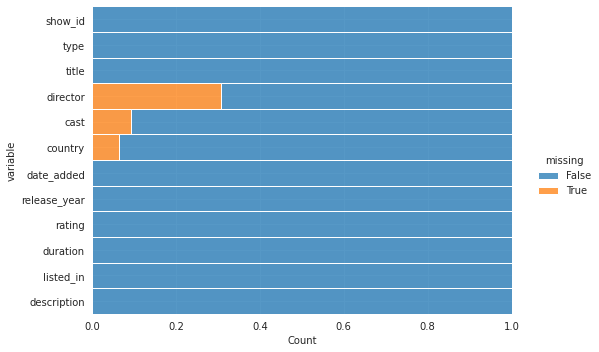

In [ ]:
#plt.figure(figsize=(12,10))
sns.displot(
    data=netflix_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.50
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

* So from above bar graph its clear that **director** and **cast** contains large number of null values.

In [ ]:
#most repeating country
netflix_df.country.mode()

0    United States
dtype: object

In [ ]:
#most repeating rating
netflix_df.rating.mode()

0    TV-MA
dtype: object

In [ ]:
#dropping irrelevant columns
#netflix_df.drop(['director','cast'],axis=1, inplace=True)

In [ ]:
#Replacing missing values in 'director' column with value 'unknown'
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'cast' column with value 'unknown'
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'country' column with mode
netflix_df['country']= netflix_df['country'].fillna(netflix_df['country'].mode()[0])

#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Dropping the null values in 'date_added'
netflix_df = netflix_df[netflix_df['date_added'].notna()]

In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


# **Exploratory Data Analysis**

***Where possible, I'll use the Netflix brand colours***

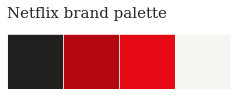

In [ ]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

**Netflix Content by Type Category**

In [ ]:
netflix_df.type.value_counts().reset_index().rename(columns={'index':'Type','type':'Count'})

,Type,Count
0,Movie,5377
1,TV Show,2400


Text(0.5, 0, 'Show Type')

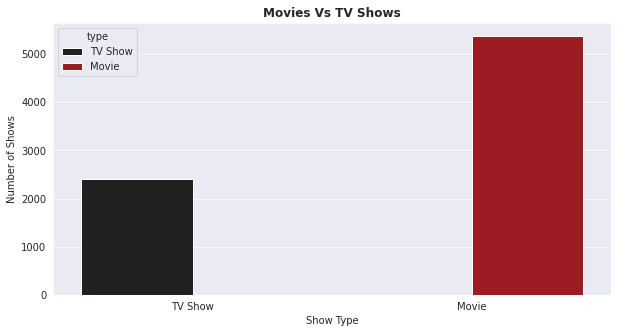

In [ ]:
#bar plot for type of shows
plt.figure(figsize=(10,5))
sns.countplot(x = 'type',hue='type',data=netflix_df,palette=['#221f1f', '#b20710'])
plt.title("Movies Vs TV Shows",weight="bold")
plt.ylabel('Number of Shows')
plt.xlabel('Show Type')

In [ ]:
#visualization
x = netflix_df['type'].value_counts().reset_index()
colors = ['#221f1f', '#b20710']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu,hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)),showlegend = False)


**Observations :**

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 69% movies and 31% TV shows on Netflix.

**Movie and TV Shows added over time**

In [ ]:
#move and tv shows added overtimes
movie_tvshow_added = netflix_df.loc[(netflix_df['type'] == 'Movie') | (netflix_df['type'] == 'TV Show'),['type','date_added']]
movie_tvshow_added['date_added'] = movie_tvshow_added['date_added'].apply(lambda x : x[-4:])
movie_tvshow_added.head()

,type,date_added
0,TV Show,2020
1,Movie,2016
2,Movie,2018
3,Movie,2017
4,Movie,2020


Text(0.5, 1.0, 'Movies and TV Shows added over time')

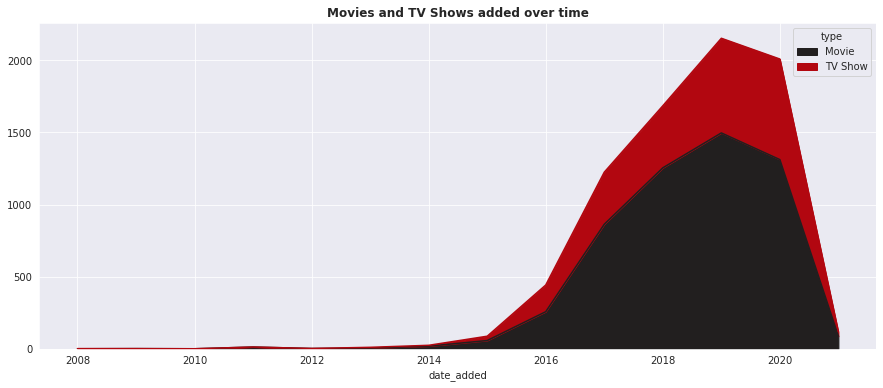

In [ ]:
#visualization
pd.crosstab(movie_tvshow_added.date_added, movie_tvshow_added.type).plot(kind='area',figsize=(15,6),color = ['#221f1f', '#b20710'])
plt.title("Movies and TV Shows added over time",weight="bold")

**Observations:**

* We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

* It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
* Netflix peak global content amount was in 2019.

* It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
* Movies have increased much more dramatically
than TV shows.

In [ ]:
#move and tv shows release year
movie_tvshow_release_year = netflix_df.loc[(netflix_df['type'] == 'Movie') | (netflix_df['type'] == 'TV Show'),['type','release_year']]
movie_tvshow_release_year['release_year'] = movie_tvshow_release_year['release_year'].apply(lambda x : str(x))
movie_tvshow_release_year.head()

,type,release_year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008


Text(0.5, 1.0, 'Movies and TV Shows released year')

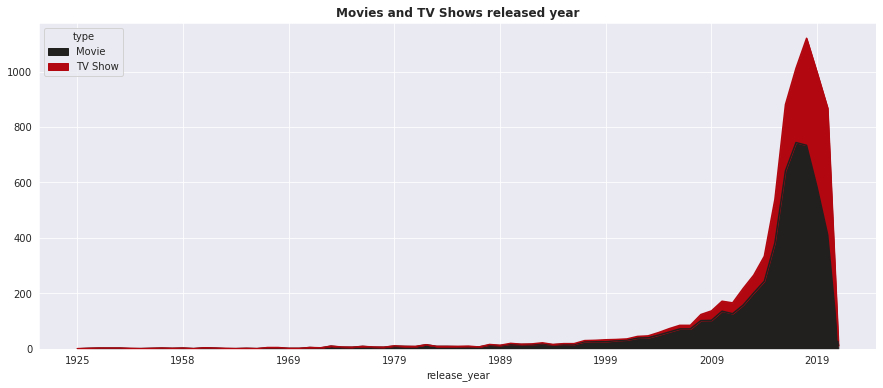

In [ ]:
#visualization
pd.crosstab(movie_tvshow_release_year.release_year, movie_tvshow_release_year.type).plot(kind='area',figsize=(15,6),color = ['#221f1f', '#b20710'])
plt.title("Movies and TV Shows released year",weight="bold")

**Observations:**<br>
* As we see plot before 2000, movies and tv shows are released very less number and things begin to pick up from 2000 and then there is a rapid increase from 2014.
* In 2019 maximum number of movies and tvshows are released.
* After 2019  movies and tvshows are released very,likely due to the COVID-19 pandemic.